In [1]:
import sys
print sys.version
#import os
#os.environ['PYSPARK_PYTHON'] = 'python2'

2.7.6 (default, Jun 22 2015, 18:00:18) 
[GCC 4.8.2]


In [2]:
import pyspark
sc = pyspark.SparkContext('local[*]')

ValueError: Cannot run multiple SparkContexts at once; existing SparkContext(app=PySparkShell, master=local[*]) created by <module> at /usr/local/lib/python2.7/dist-packages/IPython/utils/py3compat.py:286 

In [3]:
sc.master

u'local[*]'

In [4]:
rdd = sc.parallelize(range(1, 1000))
rdd.count()

999

In [6]:
%

ERROR: Line magic function `%AddDeps` not found.


In [5]:
from pyspark.sql import SQLContext
sqlContext = SQLContext(sc)
bankPython = sqlContext.read.format("com.databricks.spark.csv").option("header", "true").option("delimiter",";").option("inferSchema", "true").load("/vagrant/zeppelin_notebooks/bank.csv")

Py4JJavaError: An error occurred while calling o33.load.
: java.lang.ClassNotFoundException: Failed to load class for data source: com.databricks.spark.csv.
	at org.apache.spark.sql.execution.datasources.ResolvedDataSource$.lookupDataSource(ResolvedDataSource.scala:67)
	at org.apache.spark.sql.execution.datasources.ResolvedDataSource$.apply(ResolvedDataSource.scala:87)
	at org.apache.spark.sql.DataFrameReader.load(DataFrameReader.scala:114)
	at org.apache.spark.sql.DataFrameReader.load(DataFrameReader.scala:104)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:57)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:606)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:231)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:379)
	at py4j.Gateway.invoke(Gateway.java:259)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:133)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:207)
	at java.lang.Thread.run(Thread.java:745)
Caused by: java.lang.ClassNotFoundException: com.databricks.spark.csv.DefaultSource
	at java.net.URLClassLoader$1.run(URLClassLoader.java:366)
	at java.net.URLClassLoader$1.run(URLClassLoader.java:355)
	at java.security.AccessController.doPrivileged(Native Method)
	at java.net.URLClassLoader.findClass(URLClassLoader.java:354)
	at java.lang.ClassLoader.loadClass(ClassLoader.java:425)
	at java.lang.ClassLoader.loadClass(ClassLoader.java:358)
	at org.apache.spark.sql.execution.datasources.ResolvedDataSource$$anonfun$4$$anonfun$apply$1.apply(ResolvedDataSource.scala:60)
	at org.apache.spark.sql.execution.datasources.ResolvedDataSource$$anonfun$4$$anonfun$apply$1.apply(ResolvedDataSource.scala:60)
	at scala.util.Try$.apply(Try.scala:161)
	at org.apache.spark.sql.execution.datasources.ResolvedDataSource$$anonfun$4.apply(ResolvedDataSource.scala:60)
	at org.apache.spark.sql.execution.datasources.ResolvedDataSource$$anonfun$4.apply(ResolvedDataSource.scala:60)
	at scala.util.Try.orElse(Try.scala:82)
	at org.apache.spark.sql.execution.datasources.ResolvedDataSource$.lookupDataSource(ResolvedDataSource.scala:60)
	... 14 more


In [5]:
from test_helper import Test

In [6]:
twelve = 12
Test.assertEquals(twelve, 12, 'twelve should equal 12')
Test.assertEqualsHashed(twelve, '7b52009b64fd0a2a49e6d8a939753077792b0554',
                        'twelve, once hashed, should equal the hashed value of 12')

1 test passed.
1 test passed.


In [7]:
# Check that Spark is working
largeRange = sc.parallelize(xrange(100000))
reduceTest = largeRange.reduce(lambda a, b: a + b)
filterReduceTest = largeRange.filter(lambda x: x % 7 == 0).sum()

print reduceTest
print filterReduceTest

# If the Spark jobs don't work properly these will raise an AssertionError
assert reduceTest == 4999950000
assert filterReduceTest == 714264285

4999950000
714264285


In [8]:
# TEST Compare lists (2b)
# This should print '1 test passed.'
unsortedList = [(5, 'b'), (5, 'a'), (4, 'c'), (3, 'a')]
Test.assertEquals(sorted(unsortedList), [(3, 'a'), (4, 'c'), (5, 'a'), (5, 'b')],
                  'unsortedList does not sort properly')

1 test passed.


In [9]:
%matplotlib inline

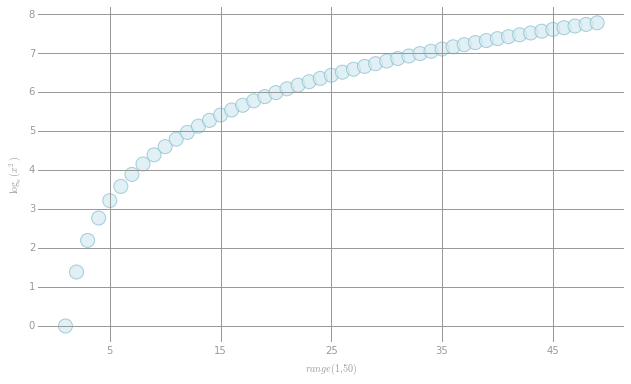

In [10]:
# Check matplotlib plotting
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from math import log

# function for generating plot layout
def preparePlot(xticks, yticks, figsize=(10.5, 6), hideLabels=False, gridColor='#999999', gridWidth=1.0):
    plt.close()
    fig, ax = plt.subplots(figsize=figsize, facecolor='white', edgecolor='white')
    ax.axes.tick_params(labelcolor='#999999', labelsize='10')
    for axis, ticks in [(ax.get_xaxis(), xticks), (ax.get_yaxis(), yticks)]:
        axis.set_ticks_position('none')
        axis.set_ticks(ticks)
        axis.label.set_color('#999999')
        if hideLabels: axis.set_ticklabels([])
    plt.grid(color=gridColor, linewidth=gridWidth, linestyle='-')
    map(lambda position: ax.spines[position].set_visible(False), ['bottom', 'top', 'left', 'right'])
    return fig, ax

# generate layout and plot data
x = range(1, 50)
y = [log(x1 ** 2) for x1 in x]
fig, ax = preparePlot(range(5, 60, 10), range(0, 12, 1))
plt.scatter(x, y, s=14**2, c='#d6ebf2', edgecolors='#8cbfd0', alpha=0.75)
ax.set_xlabel(r'$range(1, 50)$'), ax.set_ylabel(r'$\log_e(x^2)$')
pass

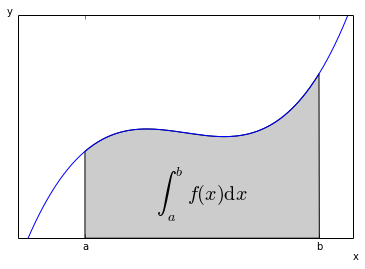

In [11]:
# implement the example graphs/integral from pyx
from pylab import *
from matplotlib.patches import Polygon

def func(x):
    return (x-3)*(x-5)*(x-7)+85

ax = subplot(111)

a, b = 2, 9 # integral area
x = arange(0, 10, 0.01)
y = func(x)
plot(x, y, linewidth=1)

# make the shaded region
ix = arange(a, b, 0.01)
iy = func(ix)
verts = [(a,0)] + list(zip(ix,iy)) + [(b,0)]
poly = Polygon(verts, facecolor='0.8', edgecolor='k')
ax.add_patch(poly)

text(0.5 * (a + b), 30,
     r"$\int_a^b f(x)\mathrm{d}x$", horizontalalignment='center',
     fontsize=20)

axis([0,10, 0, 180])
figtext(0.9, 0.05, 'x')
figtext(0.1, 0.9, 'y')
ax.set_xticks((a,b))
ax.set_xticklabels(('a','b'))
ax.set_yticks([])
show()

In [12]:
import matplotlib.pyplot as plt
import numpy as np

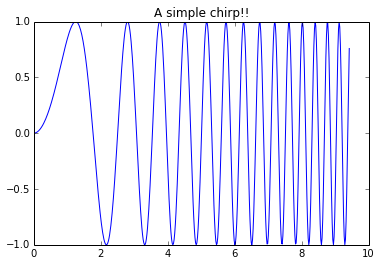

In [13]:
x = np.linspace(0, 3*np.pi, 500)
plt.plot(x, np.sin(x**2))
plt.title('A simple chirp!!');

In [1]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %install_default_config  %install_ext  %install_profiles  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %popd  %pprint  %precision  %profile  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%debug  %%file  %%html  %%javascript  %%latex  %%